# 03. 회귀분석 (Linear Regression)
---
* 날짜:
* 이름:

```
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"]='sans'
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"]='sans'

## 개념정리

---
### **단순 선형 회귀 분석(Simple Linear Regression Analysis)**
---


<h1><center>$y = wx + b$</center></h1>

#### **모델 구현**

In [2]:
def simple_linear(X, w=1, b=0):
  y = w*X+b
  return y

#### **데이터 정의**


|공부시간|종합점수|
|------|---|
|3|20|
|5|50|
|5|60|
|7|90|
|8|100|

In [3]:
X = np.array([3,5,5,7,8]).reshape((5,1))
print(X, X.shape)
Y = np.array([20,50,60,90,100]).reshape(5,1)
print(Y, Y.shape)

[[3]
 [5]
 [5]
 [7]
 [8]] (5, 1)
[[ 20]
 [ 50]
 [ 60]
 [ 90]
 [100]] (5, 1)


#### **예측**

In [4]:
Y_pred = simple_linear(X)
print(Y_pred, Y_pred.shape)

[[3]
 [5]
 [5]
 [7]
 [8]] (5, 1)


* 시각화

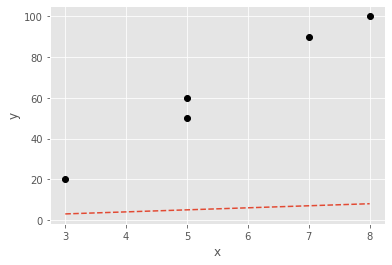

In [5]:
# 데이터샘플
plt.plot(X, Y, marker='o', linestyle='', color='k')
plt.plot(X, Y_pred, linestyle='--')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

* w 값에 따른 예측값 변화

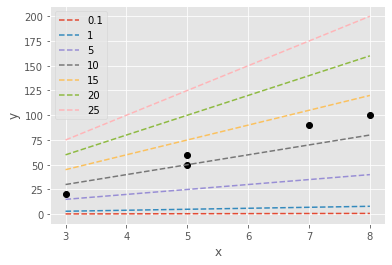

In [6]:
# 데이터샘플
plt.plot(X, Y, marker='o', linestyle='', color='k')

for w in [0.1, 1, 5, 10, 15, 20, 25]:
  plt.plot(X, simple_linear(X, w=w), linestyle='--', label=w)

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

* b 값에 따른 예측값 변화

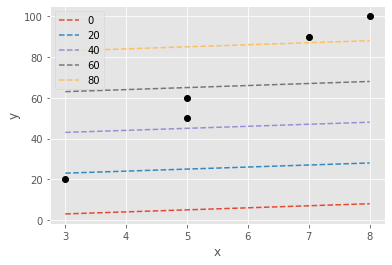

In [7]:
# 데이터샘플
plt.plot(X, Y, marker='o', linestyle='', color='k')

for b in [0,20,40,60,80]:
  plt.plot(X, simple_linear(X, b=b), linestyle='--', label=b)

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

---
### **비용함수 (Cost function)**
---




####**MSE (Mean Squred Error)**

<p align="center">
<img src=https://wikidocs.net/images/page/53560/%EA%B7%B8%EB%A6%BC3.PNG width="500">
</p>





* 구현

<h1><center>$ MSE = \frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2$</center></h1>

In [8]:
def MSE(Y, Y_pred):
  assert len(Y)==len(Y_pred)
  
  n = len(Y)
  return (1/n) * np.sum((Y-Y_pred)**2)

* MSE 계산

In [9]:
error = MSE(Y, Y_pred)
print(error)

4138.400000000001


*  W 값에 따른 Error 값 변화

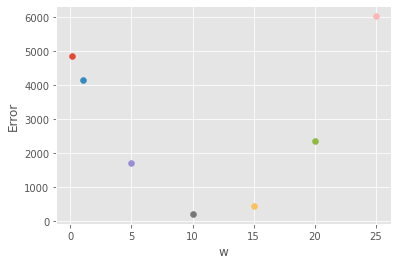

In [10]:
for w in [0.1, 1, 5, 10, 15, 20, 25]:
  Y_pred = simple_linear(X, w=w)
  error = MSE(Y, Y_pred)
  plt.scatter(w, error)

plt.xlabel("w")
plt.ylabel("Error")
plt.show()

---
### **옵티마이저 (Optimizer)**
---








####**경사하강법(Gradient Descent)**


<p align="center">
<img src=https://wikidocs.net/images/page/21670/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%803.JPG width="400">
</p>



* 구현

<h1><center>$ w^* = w-\alpha\frac{\theta}{\theta w} cost(w)$</center></h1>

In [11]:
def descent_cost(x, y, w):
  return 2*(x**2)*(w)-2*x*y

def GD(x, y, w, alpha=0.01):
  w_star = w-alpha*descent_cost(x,y,w)
  return w_star

* 최적화

In [12]:
w = 1

for i in range(3):
  for x, y in zip(X, Y):
    print(w)
    w_star = GD(x,y,w)
  print("---end iter---")

1
1
1
1
1
---end iter---
1
1
1
1
1
---end iter---
1
1
1
1
1
---end iter---


* 파라미터 $\alpha=0.02$

In [13]:
w = 1

for i in range(3):
  for x, y in zip(X, Y):
    print(w)
    w = GD(x,y,w, alpha=0.001)
  print("---end iter---")

1
[1.102]
[1.5469]
[2.069555]
[3.12673861]
---end iter---
[4.32651607]
[4.36863878]
[4.65020684]
[5.0176965]
[5.78596224]
---end iter---
[6.64535907]
[6.64574261]
[6.81345548]
[7.07278271]
[7.63965]
---end iter---


* 파라미터 $\alpha=0.05$

In [14]:
w = 1

for i in range(3):
  for x, y in zip(X, Y):
    print(w)
    w = GD(x,y,w, alpha=0.05)
  print("---end iter---")

1
[6.1]
[15.85]
[6.225]
[38.7225]
---end iter---
[-129.1015]
[-6.91015]
[35.365225]
[-23.0478375]
[152.88656625]
---end iter---
[-745.58745775]
[-68.55874577]
[127.83811866]
[-161.75717799]
[693.85299418]
---end iter---


---
### **다중 선형 회귀 분석(Multiple Linear Regression Analysis)**
---

집의 매매 가격은 단순히 집의 평수가 크다고 결정되는 게 아니라 집의 층의 수, 방의 개수, 지하철 역과의 거리와도 영향이 있습니다. 이러한 다수의 요소를 가지고 집의 매매 가격을 예측해보고 싶습니다. 는 여전히 1개이지만 이제 는 1개가 아니라 여러 개가 되었습니다. 이제 이를 다중 선형 회귀 분석이라고 합니다. 이에 대한 실습은 뒤에서 진행합니다.

<h1><center>$y = xW + \vec{b}$</center></h1>

#### **모델 구현**

In [15]:
def multiple_linear(X, w1=1., w2=1., b=0.):
  W = np.array([[w1], [w2]], dtype=float)
  return np.matmul(X, W)+b

#### **데이터 정의**



|공부시간|수면시간|종합점수|
|------|---|--|
|1|9|2|
|2|8|5|
|3|7|6|
|4|6|9|
|5|7|10|

In [16]:
X = np.array([[1,2,3,4,5],[9,8,7,6,7]], dtype=float).swapaxes(0,1)
print(X, X.shape)
Y = np.array([2,5,6,9,10], dtype=float).reshape(5,1)
print(Y, Y.shape)

[[1. 9.]
 [2. 8.]
 [3. 7.]
 [4. 6.]
 [5. 7.]] (5, 2)
[[ 2.]
 [ 5.]
 [ 6.]
 [ 9.]
 [10.]] (5, 1)


#### **예측**

In [17]:
Y_pred = multiple_linear(X)
print(Y_pred, Y_pred.shape)

[[10.]
 [10.]
 [10.]
 [10.]
 [12.]] (5, 1)


* W, b에 따른 예측 시각화

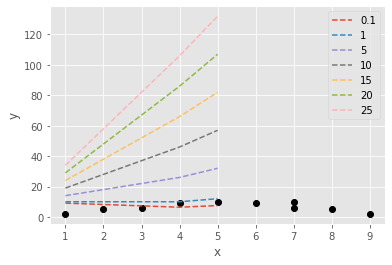

In [18]:
# 데이터샘플
plt.plot(X, Y, marker='o', linestyle='', color='k')

for w in [0.1, 1, 5, 10, 15, 20, 25]:
  plt.plot(X[:,0], multiple_linear(X, w1=w), linestyle='--', label=w)

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

---
### **sklearn 을 이용한 구현**
---

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA


* 메서드:	
  * `fit(X, y[, sample_weight])`: Fit linear model.

  * `get_params([deep])`: Get parameters for this estimator.

  * `predict(X)`: Predict using the linear model.

  * `score(X, y[, sample_weight])`: Return the coefficient of determination of the prediction.

  * `set_params(**params)`: Set the parameters of this estimator. 복귀

* 인수
  * `coef_`:array of shape (n_features, ) or (n_targets, n_features)
  * `rank_`: int Rank of matrix X. Only available when X is dense.
  * `intercept_`: float or array of shape (n_targets,)


In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
reg = LinearRegression().fit(X, Y)

In [21]:
reg.score(X, Y)

0.9805825242718447

In [22]:
reg.coef_.shape

(1, 2)

In [23]:
w1, w2 =  reg.coef_[0]
b = reg.intercept_

In [24]:
Y_pred = reg.predict(X)
print(Y, Y.shape)
print(Y_pred, Y_pred.shape)

[[ 2.]
 [ 5.]
 [ 6.]
 [ 9.]
 [10.]] (5, 1)
[[ 2.2]
 [ 4.4]
 [ 6.6]
 [ 8.8]
 [10. ]] (5, 1)


---
### **실습**
---

#### **Data**

`california housing` 데이터셋

* `longitude`: 경도
* `latitude`: 위도
* `housing_median_age`: 주택나이
* `total_rooms`: 전체 방수
* `total_bedromms`: 전체 침실 수
* `population`: 인구
* `households`: 세대
* `median_income`: 소득(중앙값)
* `median_house_value`: 주택 가치(중앙값)
* `ocean_proximity`: 바다근접도

* `smaple_data` 폴더에서 california_housing 데이터 불러오기

In [25]:
import pandas as pd

df = pd.read_csv("/content/sample_data/california_housing_train.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


* 데이터프레임 형식을 넘파이로 변환

In [26]:
df = df.to_numpy()
df.shape

(17000, 9)

* X, Y 구분

In [27]:
X = df[:, :-1]
Y = df[:, -1]
X.shape, Y.shape

((17000, 8), (17000,))

### **모델 학습**

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)
W, b = model.coef_, model.intercept_
print(W, W.shape)
print(b, b.shape)

[-4.31396373e+04 -4.29256731e+04  1.15069493e+03 -8.37825121e+00
  1.17648543e+02 -3.84887721e+01  4.54360026e+01  4.05070684e+04] (8,)
-3620600.8929739078 ()


In [31]:
df = pd.read_csv("/content/sample_data/california_housing_test.csv")
df.head()
df = df.to_numpy()
X_test = df[:, :-1]
Y_test = df[:, -1]
X_test.shape, Y_test.shape

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


* 성능평가

In [ ]:
def MSE(Y, Y_pred):
  assert len(Y)==len(Y_pred)
  
  n = len(Y)
  return (1/n) * np.sum((Y-Y_pred)**2)

Y_pred = model.predict(X_test)
MSE(Y_test, Y_pred)

4867205486.928805

* 결과 시각화

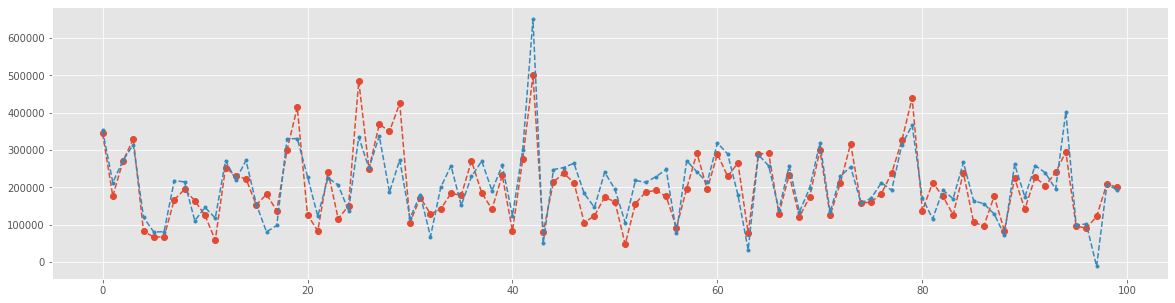

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(Y_test[:100], marker='o', linestyle='--')
plt.plot(Y_pred[:100], marker='.', linestyle='--')
plt.show()

Text(0, 0.5, 'Y pred')

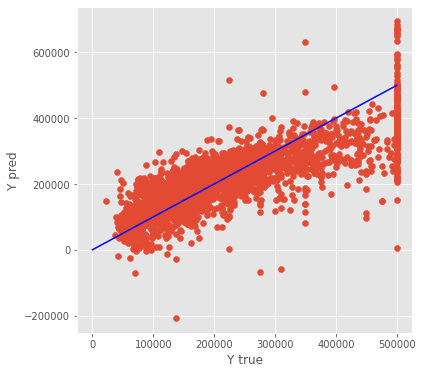

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(Y_test, Y_pred)
plt.plot([0,500000],[0, 500000], c='b')
plt.xlabel("Y true")
plt.ylabel("Y pred")

## **과제**


---
### **과제01**
---

단순 선형 회귀 분석(Simple Linear Regression Analysis) 예시 데이터 입니다. 공부시간을 이용해서 종합점수를 예측해보세요. `sklearn` 라이브러리를 이용합니다.


|공부시간|종합점수|
|------|---|
|0|0|
|1|11|
|2|23|
|3|30|
|4|44|
|5|55|
|6|61|
|7|73|
|8|84|
|9|98|

X: (10, 1)
Y (10, 1)


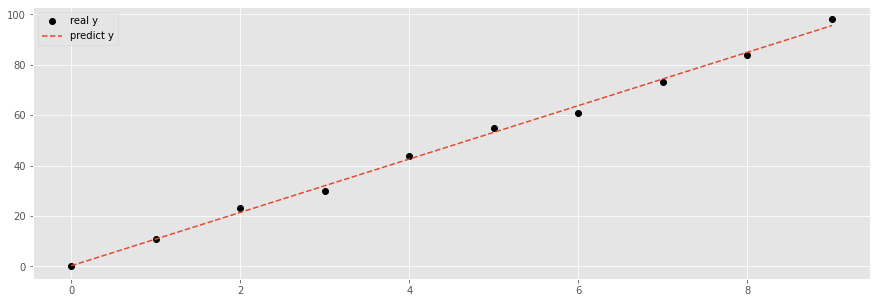

In [ ]:
x = np.arange(10).reshape(10,1)
y = np.array([0,11,23,30,44,55,61,73,84,98]).reshape(10,1)
print("X:", x.shape)
print("Y",  y.shape)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.figure(figsize=(15,5))
plt.plot(y, label='real y', marker='o', linestyle='', c='k')
plt.plot(y_pred, label='predict y', linestyle='--')
plt.legend()
plt.show()

---
### **과제02**
---

다중선형회귀 분석(Multiple Linear Regression Analysis) 예시 데이터 입니다. 공부시간, 집중도, 수면시간을 이용해서 종합점수를 예측해보세요. `sklearn` 라이브러리를 이용합니다.


|공부시간|집중도|수면시간|종합성적|
|------|---|---|---|
|0|1|9|0|
|1|1|8.5|11|
|2|2|8|23|
|3|4|8|30|
|4|3|7|44|
|5|5|7.5|55|
|6|6|7|61|
|7|6|6|73|
|8|7|7|84|
|9|6|6.5|98|

X: (10, 2)
Y (10, 1)


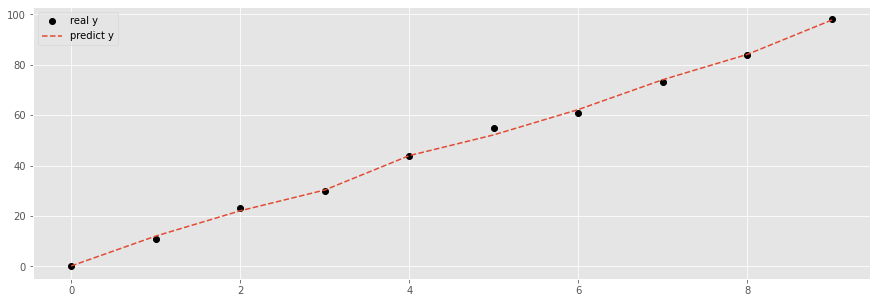

In [ ]:
x = np.array([[0,1,2,3,4,5,6,7,8,9],[1,1,2,4,3,5,6,6,7,6]]).swapaxes(0,1)
y = np.array([0,11,23,30,44,55,61,73,84,98]).reshape(10,1)
print("X:", x.shape)
print("Y",  y.shape)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.figure(figsize=(15,5))
plt.plot(y, label='real y', marker='o', linestyle='', c='k')
plt.plot(y_pred, label='predict y', linestyle='--')
plt.legend()
plt.show()

---
### **과제03**
---

위에서 실습했던 캘리포니아 데이터셋을 전처리 후 모델을 학습 시켜보세요. 전처리 전과 후의 mse 값을 비교해 보세요.
* 전처리 내용
  * longitude와	latitude를 제거하세요
  * 수치형 속성에 대해 z-score 정규화를 적용하세요

* Trainset: (17000, 6) (17000,)
* W: [ 0.20402527 -0.37507707  0.36168542 -0.34656389  0.42178996  0.790243  ] (6,)
* b: 0.07476977283635433 ()
* test set: (3000, 6) (3000,)
* predict: (3000,)
* MSE: 0.4551145680401525


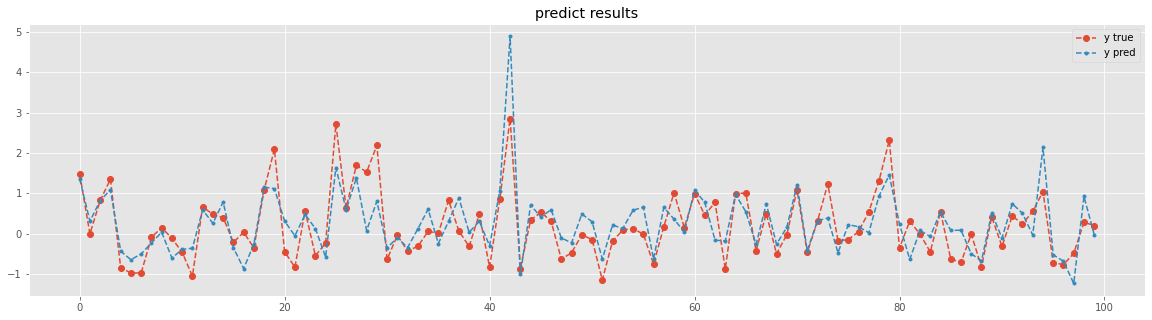

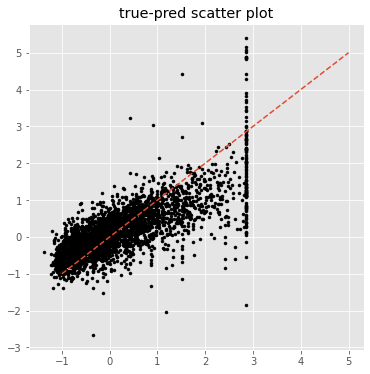

In [ ]:
from sklearn.linear_model import LinearRegression

def preprocess(csv):
  df = pd.read_csv(csv)
  df = df.drop(["longitude", "latitude"], axis=1)

  # 속성 별 정규화
  for col in df:
    df[col] = (df[col]-df[col].median())/df[col].std()

  df = df.to_numpy()
  X = df[:,:-1]
  Y = df[:,-1]
  return X, Y

X_train, Y_train = preprocess("/content/sample_data/california_housing_train.csv")
print("* Trainset:", X_train.shape, Y_train.shape)


model = LinearRegression()
model.fit(X_train, Y_train)
W, b = model.coef_, model.intercept_
print("* W:", W, W.shape)
print("* b:", b, b.shape)



X_test, Y_test = preprocess("/content/sample_data/california_housing_test.csv")
print("* test set:", X_test.shape, Y_test.shape)

Y_pred = model.predict(X_test)
print("* predict:", Y_pred.shape)

error = MSE(Y_test, Y_pred)
print("* MSE:", error)

plt.figure(figsize=(20,5))
plt.title("predict results")
plt.plot(Y_test[:100], marker='o', linestyle='--', label='y true')
plt.plot(Y_pred[:100], marker='.', linestyle='--', label='y pred')
plt.legend()
plt.show()

plt.figure(figsize=(6,6))
plt.title("true-pred scatter plot")
plt.scatter(Y_test, Y_pred, marker='.', c='k')
plt.plot([-1,5], [-1,5], linestyle='--')
plt.show()


---
### **과제04**
---

전처리한 캘리포니아 주택 데이터셋에 다양한 알고리즘을 사용해 봅니다.

#### **Ridge regression and classification**

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html?highlight=ridge#sklearn.linear_model.Ridge

* W: [ 0.20402619 -0.37458446  0.3613794  -0.34641114  0.42147512  0.79009876] (6,)
* b: 0.07479577395539494 ()
* predict: (3000,)
* MSE: 0.45510960440535075


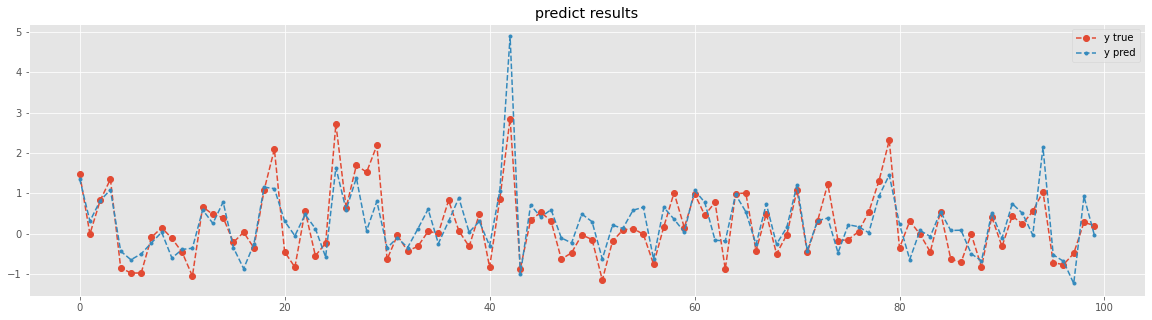

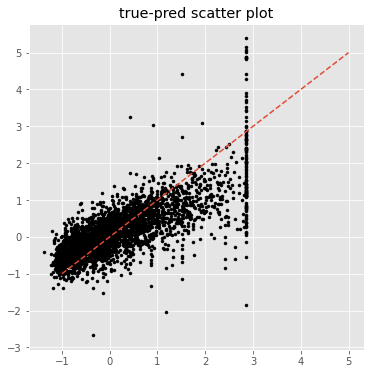

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train, Y_train)
W, b = model.coef_, model.intercept_
print("* W:", W, W.shape)
print("* b:", b, b.shape)

Y_pred = model.predict(X_test)
print("* predict:", Y_pred.shape)

error = MSE(Y_test, Y_pred)
print("* MSE:", error)

plt.figure(figsize=(20,5))
plt.title("predict results")
plt.plot(Y_test[:100], marker='o', linestyle='--', label='y true')
plt.plot(Y_pred[:100], marker='.', linestyle='--', label='y pred')
plt.legend()
plt.show()

plt.figure(figsize=(6,6))
plt.title("true-pred scatter plot")
plt.scatter(Y_test, Y_pred, marker='.', c='k')
plt.plot([-1,5], [-1,5], linestyle='--')
plt.show()

* **알고리즘 소개**
  * .
  * .

#### **Lasso**

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

* W: [ 0.07639444  0.          0.         -0.          0.          0.60072125] (6,)
* b: 0.12771296577197927 ()
* predict: (3000,)
* MSE: 0.5314616070659046


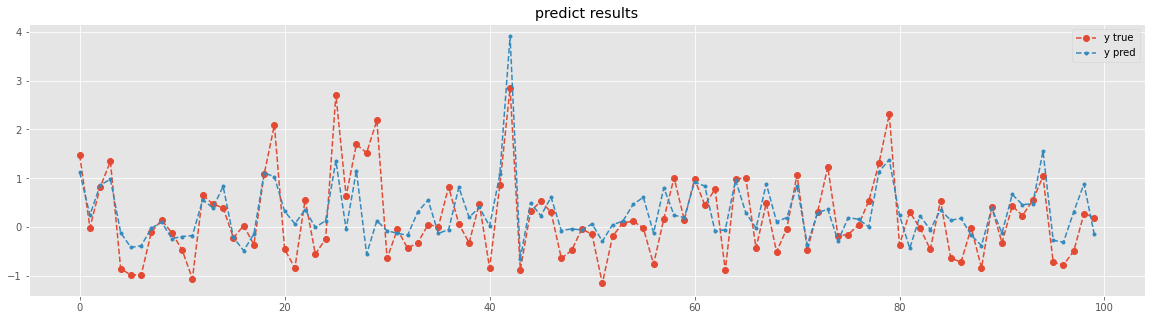

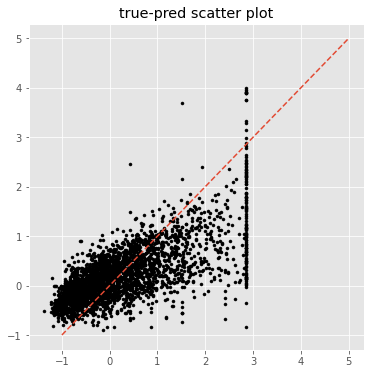

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.1)
model.fit(X_train, Y_train)
W, b = model.coef_, model.intercept_
print("* W:", W, W.shape)
print("* b:", b, b.shape)

Y_pred = model.predict(X_test)
print("* predict:", Y_pred.shape)

error = MSE(Y_test, Y_pred)
print("* MSE:", error)

plt.figure(figsize=(20,5))
plt.title("predict results")
plt.plot(Y_test[:100], marker='o', linestyle='--', label='y true')
plt.plot(Y_pred[:100], marker='.', linestyle='--', label='y pred')
plt.legend()
plt.show()

plt.figure(figsize=(6,6))
plt.title("true-pred scatter plot")
plt.scatter(Y_test, Y_pred, marker='.', c='k')
plt.plot([-1,5], [-1,5], linestyle='--')
plt.show()

* **알고리즘 소개**
  * .
  * .